In [ ]:
try:
  # %tensorflow_version  only  exists  in  Colab
  %tensorflow_version  2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [1]:
from  __future__  import  absolute_import , division , print_function ,unicode_literals
# TensorFlow  and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
data = keras.datasets.fashion_mnist
fashion_mnist_data = data.load_data ()

In [ ]:
(train_images , train_labels),(test_images , test_labels) = fashion_mnist_data

In [ ]:
print(train_images [0])
print(train_images[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
print(np.max(train_images [0]))

255


In [ ]:
class_names = [ "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
print(train_labels)
print(train_labels.shape)

[9 0 0 ... 3 0 5]
(60000,)


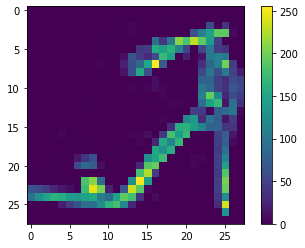

5

In [ ]:
index=8
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()

train_labels[index]

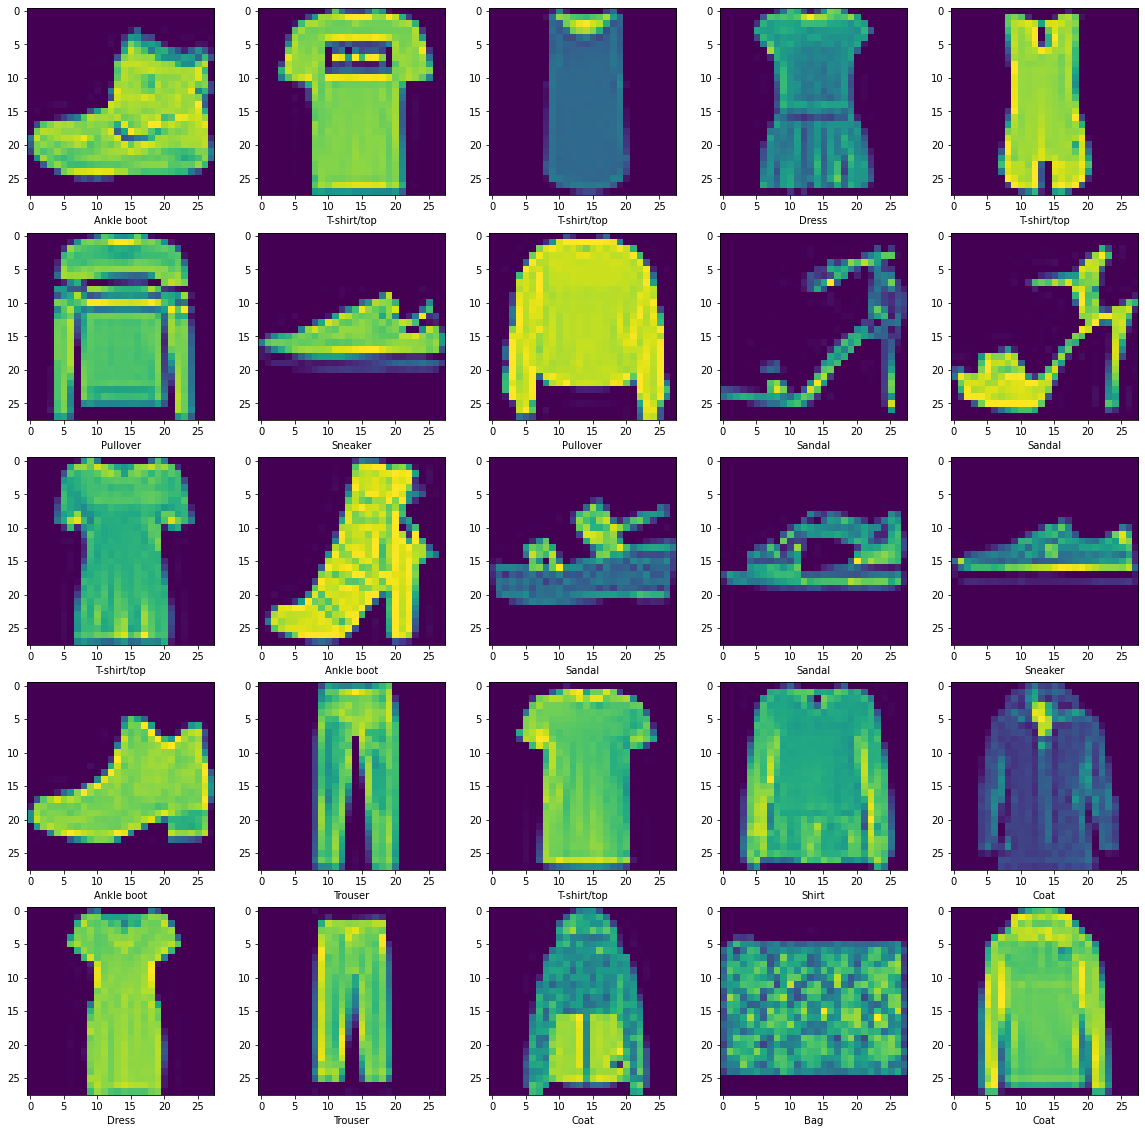

In [ ]:
plt.figure(figsize=(20,20))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks()
  plt.yticks()
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images_before=train_images
test_images_before=test_images

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
model.fit(train_images , train_labels , epochs =10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5015 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2803 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2671 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [ ]:
test_loss , test_acc = model.evaluate(test_images ,   test_labels ,verbose =2)

313/313 - 1s - loss: 0.3404 - accuracy: 0.8802 - 544ms/epoch - 2ms/step


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[0]

array([1.9124111e-09, 2.2563933e-10, 3.2139111e-11, 2.4115399e-10,
       1.7184341e-10, 3.7481496e-03, 6.1074679e-10, 5.5103796e-03,
       1.3915840e-08, 9.9074149e-01], dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))
print(np.argmax(predictions[2]))

9
2
1


In [ ]:
print(test_labels[0])
print(test_labels[1])
print(test_labels[2])

9
2
1


In [ ]:
np.max(predictions[0])

0.9907415

In [ ]:
def predict(a):
  index=a
  plt.figure()
  plt.imshow(train_images[index])
  plt.colorbar()
  plt.grid(False)
  plt.show()
  percentage=np.max(predictions[a])
  bool=False
  if np.argmax(predictions[a])==test_labels[a]:
    bool=True
  if bool:
    print("\033[1;34;47m"+ class_names[test_labels[a]]+" " + str(percentage*100)+"%"+"("+ class_names[test_labels[a]] +")")
  else: 
    print("\033[1;31;47m"+ class_names[np.argmax(predictions[a])]+" " + str(percentage*100)+"%"+"("+ class_names[test_labels[a]] +")")

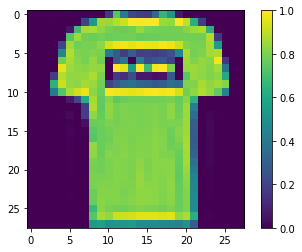

Pullover 99.85083937644958%(Pullover)


In [ ]:
predict(1)

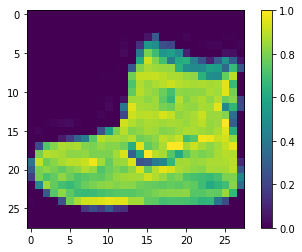

Ankle boot 99.0741491317749%(Ankle boot)


In [ ]:
predict(0)

In [ ]:
image=test_images[99]
image=np.expand_dims(image,0)

In [ ]:
predicted = model.predict(image)

1/1 [==============================] - 0s 15ms/step


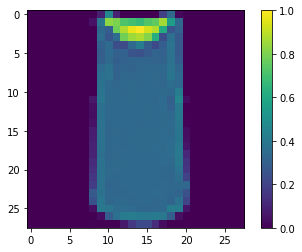

Trouser 100.0%(Trouser)


In [ ]:
predict(np.argmax(predicted))

In [ ]:
predicted

array([[2.49030243e-04, 2.51951406e-07, 8.66991818e-01, 1.42287009e-03,
        6.78048655e-03, 4.19963453e-10, 1.24547325e-01, 2.90915153e-10,
        2.75476964e-07, 7.91222465e-06]], dtype=float32)